In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
#class 0 for valid and class 1 for fraudulent
print(df.shape)

(284807, 31)


In [6]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
df = df.sample(frac = 0.2,random_state = 1)# taking a portion of data

In [8]:
df.shape

(56961, 31)

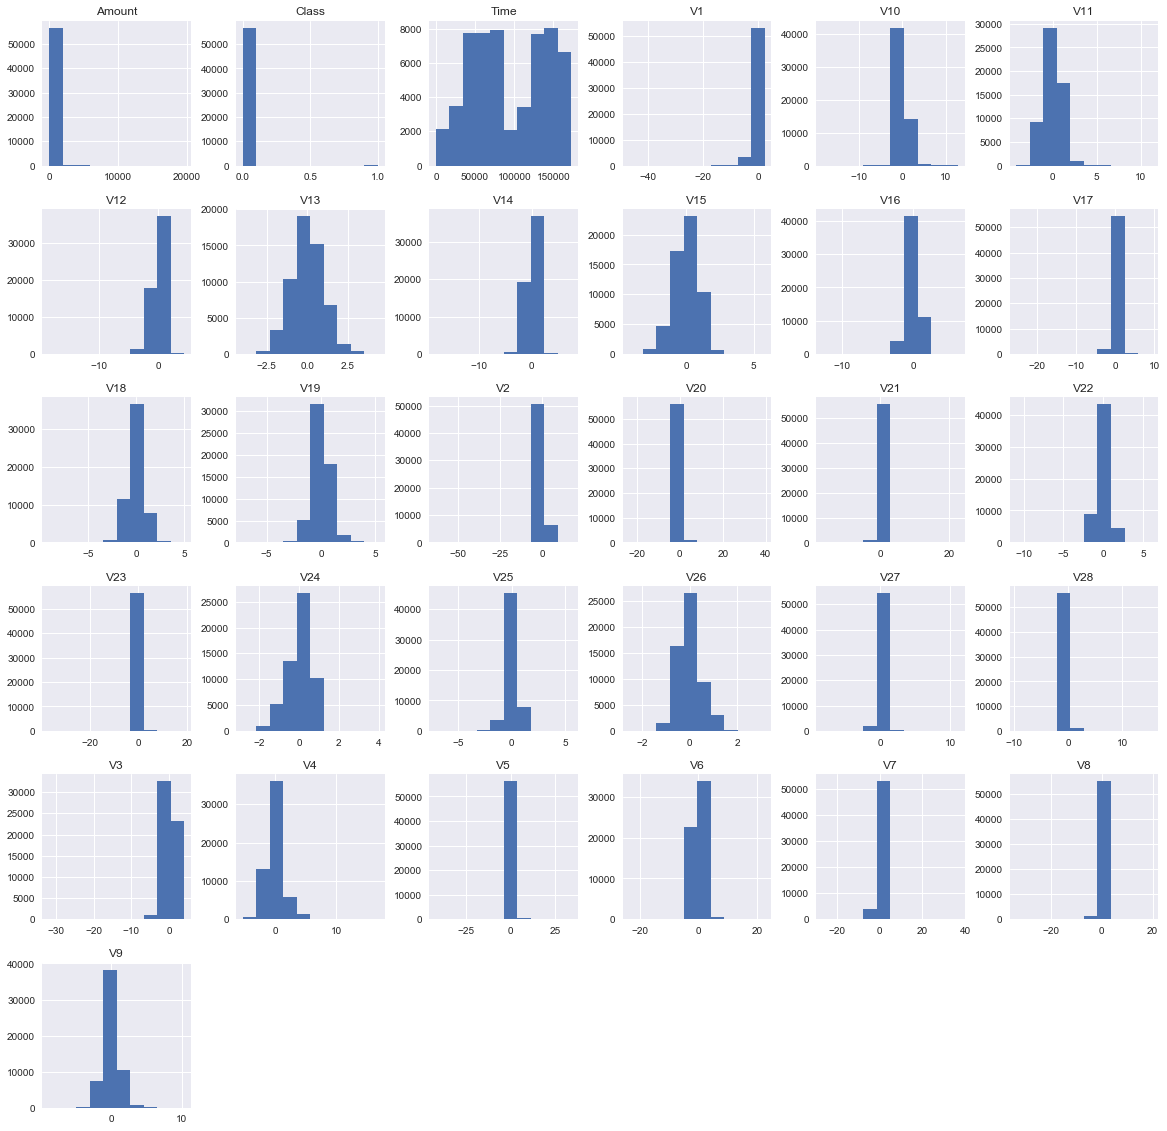

In [9]:
df.hist(figsize=(20,20))
plt.show()

In [17]:
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]

outlier_frac = len(Fraud)/float(len(Valid))
print(outliner)
print(Fraud.shape[0])

0.0015296972254457222
87


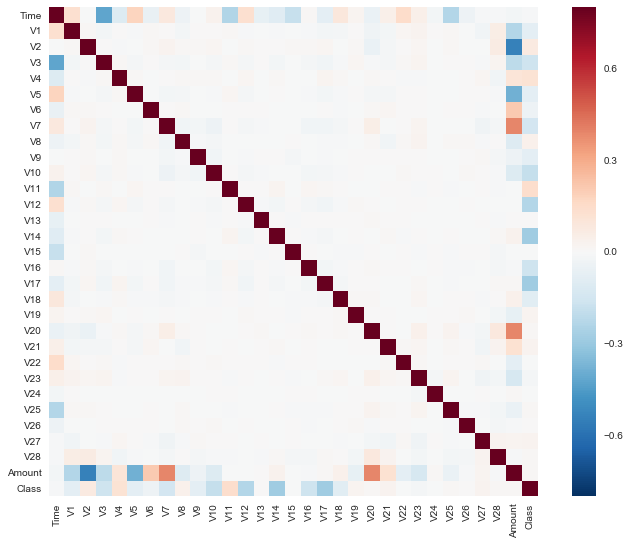

In [18]:
cormat = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(cormat,vmax = 0.8, square =True)
plt.show()

In [19]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = df[columns]
y = df[target]

print(X.shape)
print(y.shape)

(56961, 30)
(56961,)


In [20]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor

In [21]:
from sklearn.neighbors import LocalOutlierFactor

ImportError: cannot import name 'LocalOutlierFactor'

In [22]:
random_state = 1

model = IsolationForest(max_samples=len(X),contamination=outlier_frac,random_state=random_state)

In [23]:
n_ouliers = len(Fraud)
model.fit(X)
scores_pred = model.decision_function(X)
y_pred = model.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errs = (y_pred != y).sum()
print(n_errs)
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

129
0.9977352925685996
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56874
          1       0.26      0.26      0.26        87

avg / total       1.00      1.00      1.00     56961

